In [1]:
# Uses python3
import numpy as np
import xarray
import matplotlib.pyplot as plt
import cmocean
import matplotlib
%matplotlib inline
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

In [2]:
initial_z = xarray.open_dataset('linear_TS/Initial_state.nc', decode_times = False).mean(dim='lath')
initial_z.load()
initial_z = initial_z.rename( { 'Temp':'temp', 'Salt':'salt', 'Layer':'zl', 'lonh':'xh' })
linear_z = xarray.open_dataset('linear_TS/prog.nc', decode_times = False).mean(dim='yh')
linear_z.load()
rename_vars = {'xh':'Zonal Distance (m)', 'zl':'Depth (m)', 'temp':'Temp','salt':'Salt'}
initial_z = initial_z.rename(rename_vars)
linear_z = linear_z.rename(rename_vars)



/home/ashao/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


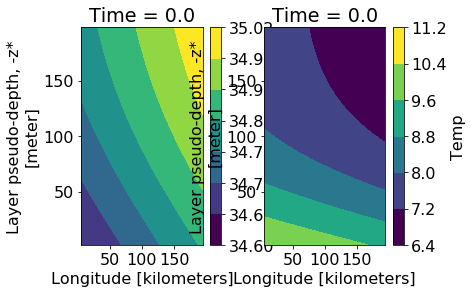

In [3]:
plt.subplot(1,2,1)
initial_z.Salt[0,:,:].plot.contourf()
plt.subplot(1,2,2)
initial_z.Temp[0,:,:].plot.contourf()

In [4]:
linear_z

<xarray.Dataset>
Dimensions:             (Depth (m): 50, Time: 1920, Zonal Distance (m): 20, xq: 20, yq: 4, zi: 51)
Coordinates:
  * xq                  (xq) float64 10.0 20.0 30.0 40.0 ... 180.0 190.0 200.0
  * Depth (m)           (Depth (m)) float64 2.0 6.0 10.0 ... 190.0 194.0 198.0
  * Time                (Time) float64 0.04167 0.08333 0.125 ... 79.96 80.0
  * Zonal Distance (m)  (Zonal Distance (m)) float64 5.0 15.0 ... 185.0 195.0
  * yq                  (yq) float64 10.0 20.0 30.0 40.0
  * zi                  (zi) float64 0.0 4.0 8.0 12.0 ... 192.0 196.0 200.0
Data variables:
    u                   (Time, Depth (m), xq) float32 0.0 0.0 0.0 ... 0.0 nan
    v                   (Time, Depth (m), yq, Zonal Distance (m)) float32 0.0 ... 0.0
    h                   (Time, Depth (m), Zonal Distance (m)) float64 4.0 ... 4.0
    e                   (Time, zi, Zonal Distance (m)) float64 0.0 ... -200.0
    Temp                (Time, Depth (m), Zonal Distance (m)) float64 10.41 ... 6.601
    Salt                (Time, Depth (m), Zonal Distance (m)) float64 34.66 ... 35.0
    rhoinsitu           (Time, Depth (m), Zonal Distance (m)) float64 1.026e+03 ... 1.027e+03
    rhopot0             (Time, Depth (m), Zonal Distance (m)) float64 1.026e+03 ... 1.027e+03
    rhopot2             (Time, Depth (m), Zonal Distance (m)) float64 1.026e+03 ... 1.027e+03
    dye001              (Time, Depth (m), Zonal Distance (m)) float64 0.0 ... 0.0

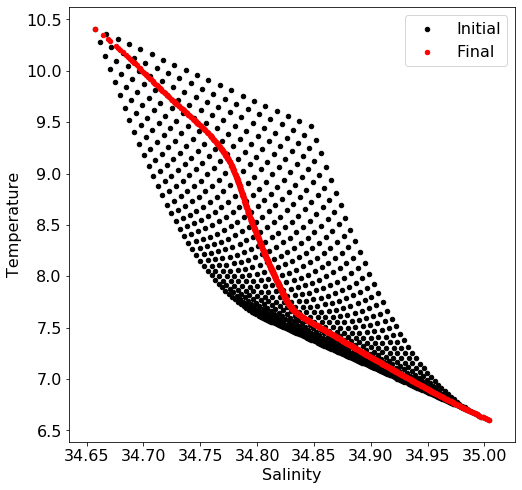

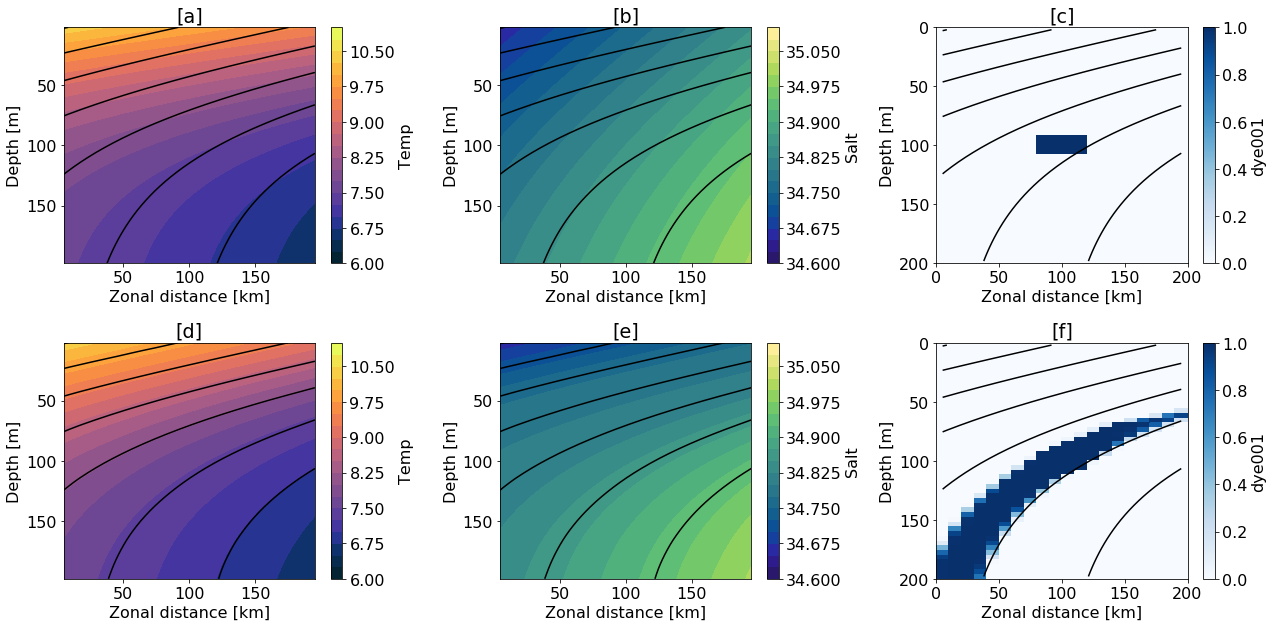

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(initial_z.Salt,initial_z.Temp,s=20.,c='k',label='Initial')
plt.scatter(linear_z.Salt[-1,:,:],linear_z.Temp[-1,:,:],s=20.,c='r',label='Final')
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.legend()
# plt.gca().set(adjustable='box-forced', aspect='equal')
plt.savefig('/home/ashao/Documents/manuscripts/neutral_diffusion/TSplot_linear.png',dpi=300)

initial_z['Depth (m)']['long_name'] = 'Depth [m]'
linear_z['Depth (m)']['long_name'] = 'Depth [m]'

smin = 34.6 ; smax = 35.1
tmin = 6 ; tmax = 11

salt_opts = { 'levels':21, 'vmin':smin, 'vmax':smax, 'cmap':cmocean.cm.haline }
temp_opts = { 'levels':21, 'vmin':tmin, 'vmax':tmax, 'cmap':cmocean.cm.thermal }
dye_opts = { 'cmap':plt.cm.Blues, 'vmin':0, 'vmax':1, 'cbar_kwargs':{'extend':'neither'} }

plt.figure(figsize=(18,9))
idx = 1
ax = plt.subplot(2,3,idx); idx += 1
linear_z['rhoinsitu'][0,...].plot.contour(colors='k',levels=8);
xarray.plot.contourf(initial_z.Temp[0,:,:],**temp_opts, ax= ax); plt.gca().invert_yaxis()
ax.set_xlabel('Zonal distance [km]'); ax.set_ylabel('Depth [m]'); ax.set_title('[a]')
ax = plt.subplot(2,3,idx); idx += 1
linear_z['rhoinsitu'][0,...].plot.contour(colors='k',levels=8)
xarray.plot.contourf(initial_z.Salt[0,:,:],**salt_opts); plt.gca().invert_yaxis() 
ax.set_xlabel('Zonal distance [km]'); ax.set_ylabel('Depth [m]'); ax.set_title('[b]')
ax = plt.subplot(2,3,idx); idx += 1
linear_z['rhoinsitu'][0,...].plot.contour(colors='k',levels=8)
xarray.plot.pcolormesh(initial_z.dye001[0,:,:],**dye_opts); plt.gca().invert_yaxis() 
ax.set_xlabel('Zonal distance [km]'); ax.set_ylabel('Depth [m]'); ax.set_title('[c]')
ax = plt.subplot(2,3,idx); idx += 1
linear_z['rhoinsitu'][-1,...].plot.contour(colors='k',levels=8)
xarray.plot.contourf(linear_z.Temp[-1,:,:],**temp_opts); ax.invert_yaxis()
ax.set_xlabel('Zonal distance [km]'); ax.set_ylabel('Depth [m]'); ax.set_title('[d]')
ax = plt.subplot(2,3,idx); idx += 1
linear_z['rhoinsitu'][-1,...].plot.contour(colors='k',levels=8)
xarray.plot.contourf(linear_z.Salt[-1,:,:],**salt_opts); ax.invert_yaxis()
ax.set_xlabel('Zonal distance [km]'); ax.set_ylabel('Depth [m]'); ax.set_title('[e]')
ax = plt.subplot(2,3,idx); idx += 1
linear_z['rhoinsitu'][0,...].plot.contour(colors='k',levels=8)
xarray.plot.pcolormesh(linear_z.dye001[-1,:,:], **dye_opts); plt.gca().invert_yaxis() 
ax.set_xlabel('Zonal distance [km]'); ax.set_ylabel('Depth [m]'); ax.set_title('[f]')

plt.tight_layout()
plt.savefig('/home/ashao/Documents/manuscripts/neutral_diffusion/TSevolve_linear.png',dpi=300)

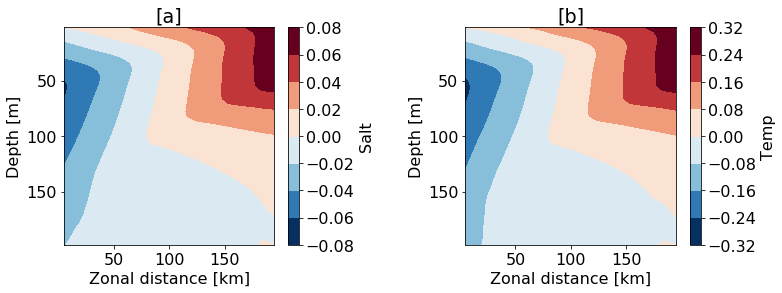

In [11]:
fig = plt.figure(figsize=(12,4))
ax = plt.subplot(1,2,1)
(initial_z.Salt[0,:,:]-linear_z.Salt[-1,:,:]).plot.contourf(levels=10); plt.gca().invert_yaxis();ax.set(adjustable='box', aspect='equal')
ax.set_xlabel('Zonal distance [km]'); ax.set_ylabel('Depth [m]'); ax.set_title('[b]')
plt.title('[a]')
ax = plt.subplot(1,2,2)
(initial_z.Temp[0,:,:]-linear_z.Temp[-1,:,:]).plot.contourf(levels=10); plt.gca().invert_yaxis();ax.set(adjustable='box', aspect='equal')
ax.set_xlabel('Zonal distance [km]'); ax.set_ylabel('Depth [m]'); ax.set_title('[b]')
plt.title('[b]')
fig.subplots_adjust(wspace=0.5)
plt.savefig('/home/ashao/Documents/manuscripts/neutral_diffusion/TSdiff_linear.png',dpi=300)

In [7]:
np.sqrt(np.mean(np.square(linear_z.rhopot2[-1,5:40,:]-linear_z.rhopot2[0,5:40,:])))

<xarray.DataArray 'rhopot2' ()>
array(0.00029486)

In [8]:
initial_z.Temp.max()-linear_z.Temp.max()

<xarray.DataArray 'Temp' ()>
array(-0.00643469)

In [12]:
print(linear_z.rhopot2.min(),linear_z.rhopot2.max())

<xarray.DataArray 'rhopot2' ()>
array(1025.64393847) <xarray.DataArray 'rhopot2' ()>
array(1026.68307841)


/home/ashao/miniconda3/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/ashao/miniconda3/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


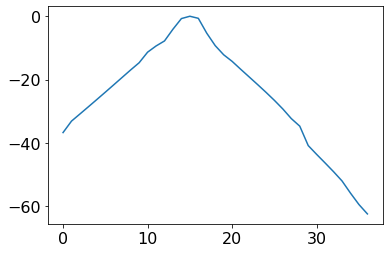

In [10]:
plt.plot(np.log10(linear_z.dye001[-1,:,-1]))